In [67]:
import xlsxwriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from openpyxl.chart import BarChart3D,Reference
import pandas
import matplotlib.style as style

In [68]:
EAGLERAYBP_DATA = r'O:\PDI-Barlap\Aoo\YLD_MNT\EAGLERAYBP.csv'
FDBHMR6ET_DATA = r'O:\PDI-Barlap\Aoo\YLD_MNT\FDBHMR6ET.csv'
OUT_PATH = r'O:\PDI-Barlap\Aoo\YLD_MNT\YLD.csv'
FY_Car = r'O:\PDI-Barlap\Aoo\YLD_MNT\Calendar.csv'

In [69]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

In [70]:
eag = pd.read_csv(EAGLERAYBP_DATA)
fdb = pd.read_csv(FDBHMR6ET_DATA)
all = pd.concat([eag,fdb])
all["STARTQTY"] = all["STARTQTY"].fillna(0)
all["REASONQTY"] = all["REASONQTY"].fillna(0)
all["BONUSQTY"] = all["BONUSQTY"].fillna(0)
all["DEFECTPERCENTAGE"] = all["DEFECTPERCENTAGE"].fillna(0)
all["NORMALISED"] = all["NORMALISED"].fillna(0)
all["TotalQty"] = all["FinalShipQty"] + all["TotalScrapQty"]
all["Net_REASONQTY"] = all["FinalShipQty"] + all["TotalScrapQty"]
all["%DEFECT"] = all["REASONQTY"]/all["TotalQty"]*100
loading_parts = (pd.pivot_table(all, values='TotalQty', index=['Time_Date'], columns=['PRODUCT'], aggfunc=np.mean,fill_value=0 , margins=False).reset_index().rename_axis(None, axis=0))
defect_parts = (pd.pivot_table(all, values='REASONQTY', index=['PRODUCT','Time_Date'], columns=['DEF_CODE'], aggfunc=np.sum, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))

all.head(10)
#defect_parts
#loading_parts

,WW,Time_Date,FinalShipQty,TotalScrapQty,R ShipQty,InProcess Yield,Machine Yield,Drill Down By,DEF_CODE,STEPNAME,REASONCODE,STARTQTY,REASONQTY,BONUSQTY,DEFECTPERCENTAGE,NORMALISED,PRODUCT,TotalQty,Net_REASONQTY,%DEFECT
0,FY2201,20210703,1240,2346,0,90.06,94.63,DefectGrp,130.0,AKL ABS TOOLTEK,139-BrkBarM,24829.0,50.0,0.0,0.20,2.13,EAGLERAYBP,3586,3586,1.394311
1,FY2201,20210703,1240,2346,0,90.06,94.63,DefectGrp,130.0,CYCLOHEXANE IRC,139-BrkBarM,20147.0,51.0,0.0,0.25,2.17,EAGLERAYBP,3586,3586,1.422197
2,FY2201,20210703,1240,2346,0,90.06,94.63,DefectGrp,130.0,FREE BAR PLACEMENT,139-BrkBarM,24813.0,34.0,0.0,0.14,1.45,EAGLERAYBP,3586,3586,0.948132
3,FY2201,20210704,21760,2865,0,0.00,87.29,DefectGrp,130.0,LapTrack,032-BrkBar,27725.0,52.0,0.0,0.19,1.82,EAGLERAYBP,24625,24625,0.211168
4,FY2201,20210705,5037,4493,0,0.00,81.06,DefectGrp,110.0,AKL LAPPING,142-AKL,23428.0,30.0,0.0,0.13,0.67,EAGLERAYBP,9530,9530,0.314795
5,FY2201,20210705,5037,4493,0,0.00,81.06,DefectGrp,110.0,LapTrack,033-OSL,18880.0,62.0,0.0,0.33,1.38,EAGLERAYBP,9530,9530,0.650577
6,FY2201,20210705,5037,4493,0,0.00,81.06,DefectGrp,130.0,AKL BAR MOUNT,032-BrkBar,26858.0,65.0,0.0,0.24,1.45,EAGLERAYBP,9530,9530,0.682057
7,FY2201,20210705,5037,4493,0,0.00,81.06,DefectGrp,130.0,CYCLOHEXANE IRC,139-BrkBarM,22307.0,61.0,0.0,0.27,1.36,EAGLERAYBP,9530,9530,0.640084
8,FY2201,20210706,2711,2642,0,73.28,86.79,DefectGrp,110.0,AKL LAPPING,142-AKL,23197.0,124.0,0.0,0.53,4.69,EAGLERAYBP,5353,5353,2.316458
9,FY2201,20210706,2711,2642,0,73.28,86.79,DefectGrp,130.0,AKL BAR MOUNT,032-BrkBar,21630.0,29.0,0.0,0.13,1.10,EAGLERAYBP,5353,5353,0.541752


In [71]:
E_Defect = defect_parts.loc[(defect_parts.PRODUCT == "EAGLERAYBP")]
E_Defect = pd.merge(loading_parts, E_Defect, on="Time_Date", how="outer").drop(columns=["FDBHMR6ET"])
E_Defect = E_Defect.rename(columns={"EAGLERAYBP": "TOTAL", 110: "STH",130: "BRK"})
E_Defect["PRODUCT"] = E_Defect["PRODUCT"].fillna("EAGLERAYBP")
E_Defect["STH"] = E_Defect["STH"].fillna(0)
E_Defect["BRK"] = E_Defect["BRK"].fillna(0)
F_Defect = defect_parts.loc[(defect_parts.PRODUCT == "FDBHMR6ET")]
F_Defect = pd.merge(loading_parts, F_Defect, on="Time_Date", how="outer").drop(columns=["EAGLERAYBP"])
F_Defect = F_Defect.rename(columns={"FDBHMR6ET": "TOTAL", 110: "STH",130: "BRK"})
F_Defect["PRODUCT"] = F_Defect["PRODUCT"].fillna("FDBHMR6ET")
F_Defect["STH"] = F_Defect["STH"].fillna(0)
F_Defect["BRK"] = F_Defect["BRK"].fillna(0)
EF_Defect = E_Defect.append(F_Defect)
EF_Defect["%DEFECT_STH"] = EF_Defect["STH"]/EF_Defect["TOTAL"]*100
EF_Defect["%DEFECT_BRK"] = EF_Defect["BRK"]/EF_Defect["TOTAL"]*100
Fiscal = pd.read_csv(FY_Car)
EF_Defect = pd.merge(Fiscal, EF_Defect, on="Time_Date", how="inner")
EF_Defect.to_csv(OUT_PATH, index=None)
EF_Defect.tail(10)


,WW,Time_Date,TOTAL,PRODUCT,STH,BRK,%DEFECT_STH,%DEFECT_BRK
232,FY2217,20211027,27827,EAGLERAYBP,11.0,301.0,0.039530,1.081683
233,FY2217,20211027,3733,FDBHMR6ET,0.0,0.0,0.000000,0.000000
234,FY2217,20211028,25934,EAGLERAYBP,0.0,397.0,0.000000,1.530809
235,FY2217,20211028,1574,FDBHMR6ET,0.0,0.0,0.000000,0.000000
236,FY2217,20211029,16886,EAGLERAYBP,0.0,0.0,0.000000,0.000000
237,FY2217,20211029,3750,FDBHMR6ET,0.0,56.0,0.000000,1.493333
238,FY2218,20211030,12697,EAGLERAYBP,6.0,0.0,0.047255,0.000000
239,FY2218,20211030,4680,FDBHMR6ET,0.0,0.0,0.000000,0.000000
240,FY2218,20211031,15549,EAGLERAYBP,12.0,65.0,0.077175,0.418033
241,FY2218,20211031,4160,FDBHMR6ET,0.0,0.0,0.000000,0.000000


In [72]:
DW = (pd.pivot_table(all, values='REASONQTY', index=['WW',"PRODUCT"], columns=['DEF_CODE'], aggfunc=np.sum, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))

CW = (pd.pivot_table(all, values='TotalQty', index=['WW',"Time_Date","PRODUCT"], columns=['Drill Down By'], aggfunc=np.mean, fill_value=0, margins=False).reset_index().rename_axis(None, axis=0))
CE = (CW.groupby(["WW","PRODUCT"]).sum().reset_index().rename_axis(None, axis=0))
CE = pd.concat([CE, DW], axis=1)
CE = CE.iloc[:,[0,1,3,6,7]]
CE = CE.rename(columns={"DefectGrp": "TOTAL", 110: "STH",130: "BRK"})
CE["%DEFECT_STH"] = CE["STH"]/CE["TOTAL"]*100
CE["%DEFECT_BRK"] = CE["BRK"]/CE["TOTAL"]*100
CE


,WW,PRODUCT,TOTAL,STH,BRK,%DEFECT_STH,%DEFECT_BRK
0,FY2201,EAGLERAYBP,76966,596.0,516.0,0.774368,0.670426
1,FY2201,FDBHMR6ET,22654,63.0,0.0,0.278097,0.000000
2,FY2202,EAGLERAYBP,84238,119.0,533.0,0.141266,0.632731
3,FY2202,FDBHMR6ET,11584,126.0,53.0,1.087707,0.457528
4,FY2203,EAGLERAYBP,160132,218.0,111.0,0.136138,0.069318
5,FY2203,FDBHMR6ET,14576,68.0,119.0,0.466520,0.816411
6,FY2204,EAGLERAYBP,56560,172.0,217.0,0.304102,0.383663
7,FY2204,FDBHMR6ET,20070,1.0,62.0,0.004983,0.308919
8,FY2205,EAGLERAYBP,58615,306.0,480.0,0.522051,0.818903
9,FY2205,FDBHMR6ET,19485,205.0,0.0,1.052091,0.000000


In [73]:
CE1 = CE.iloc[:-2,:]
CE1


,WW,PRODUCT,TOTAL,STH,BRK,%DEFECT_STH,%DEFECT_BRK
0,FY2201,EAGLERAYBP,76966,596.0,516.0,0.774368,0.670426
1,FY2201,FDBHMR6ET,22654,63.0,0.0,0.278097,0.000000
2,FY2202,EAGLERAYBP,84238,119.0,533.0,0.141266,0.632731
3,FY2202,FDBHMR6ET,11584,126.0,53.0,1.087707,0.457528
4,FY2203,EAGLERAYBP,160132,218.0,111.0,0.136138,0.069318
5,FY2203,FDBHMR6ET,14576,68.0,119.0,0.466520,0.816411
6,FY2204,EAGLERAYBP,56560,172.0,217.0,0.304102,0.383663
7,FY2204,FDBHMR6ET,20070,1.0,62.0,0.004983,0.308919
8,FY2205,EAGLERAYBP,58615,306.0,480.0,0.522051,0.818903
9,FY2205,FDBHMR6ET,19485,205.0,0.0,1.052091,0.000000


In [74]:
RS = pd.merge(CE1, EF_Defect, on="WW", how="outer").fillna("OK")
RS = RS.loc[RS.PRODUCT_x == 'OK']
RS = RS.iloc[:,[7,8,9,10,11,12,13]]
RS = RS[["Time_Date","TOTAL_y","PRODUCT_y","STH_y","BRK_y","%DEFECT_STH_y","%DEFECT_BRK_y"]]
RS = RS.rename(columns={"Time_Date": "WW","TOTAL_y": "TOTAL" ,"PRODUCT_y": "PRODUCT", "STH_y": "STH", "BRK_y": "BRK", "%DEFECT_STH_y": "%DEFECT_STH", "%DEFECT_BRK_y": "%DEFECT_BRK"})
PP = CE1.append(RS)
PP["TOTAL"] = PP["TOTAL"]/1000
PP['WW'] = PP['WW'].astype('string')
#PP.WW = PP.WW.astype(str)
#PP['WW'] = PP['WW'].astype('|S')
PP['%DEFECT_STH'] = PP['%DEFECT_STH'].astype('float')
PP['%DEFECT_BRK'] = PP['%DEFECT_BRK'].astype('float')
PP.dtypes


WW              string
PRODUCT         object
TOTAL          float64
STH            float64
BRK            float64
%DEFECT_STH    float64
%DEFECT_BRK    float64
dtype: object

Text(0, 0.5, '%Defect')

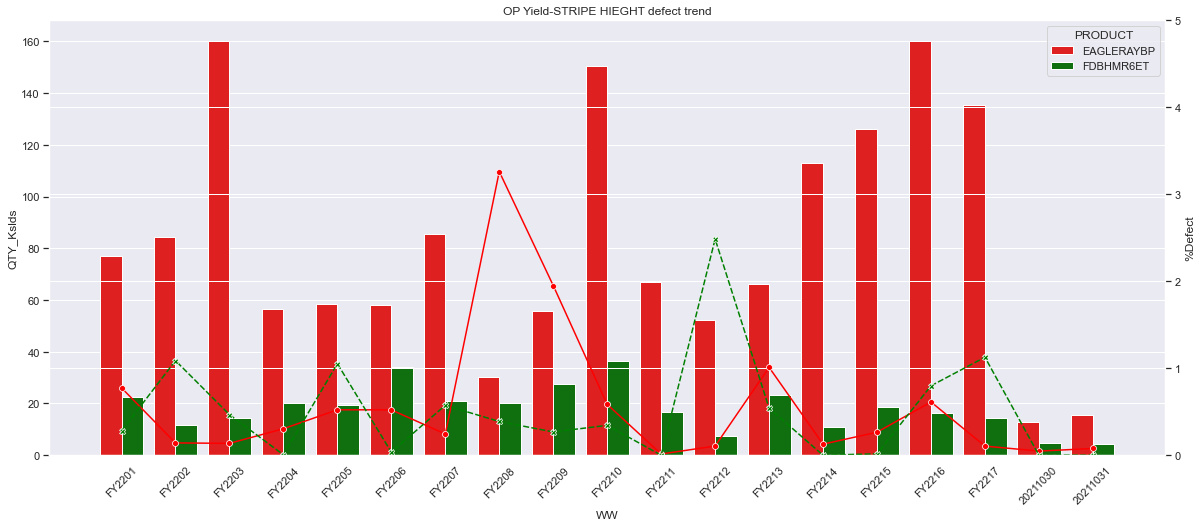

In [75]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax2=ax1.twinx()
palette = ("red","green")

sns.barplot(x='WW', y='TOTAL', data=PP, hue='PRODUCT',palette=(palette),ax=ax1)
sns.set(style="darkgrid", color_codes=True)
ax1.set_xticklabels(ax1.get_xticks(), rotation=45)
ax1.set_ylabel("QTY_Kslds")
ax1.set(title='OP Yield-STRIPE HIEGHT defect trend')

ax2.set_ylim(0,5)
sns.lineplot(x='WW',y='%DEFECT_STH', data=PP, hue='PRODUCT', style="PRODUCT", markers=True,palette=(palette), ax=ax2, legend = None)
ax2.set_ylabel("%Defect")

#style.use('seaborn-pastel')

Text(0, 0.5, '%Defect')

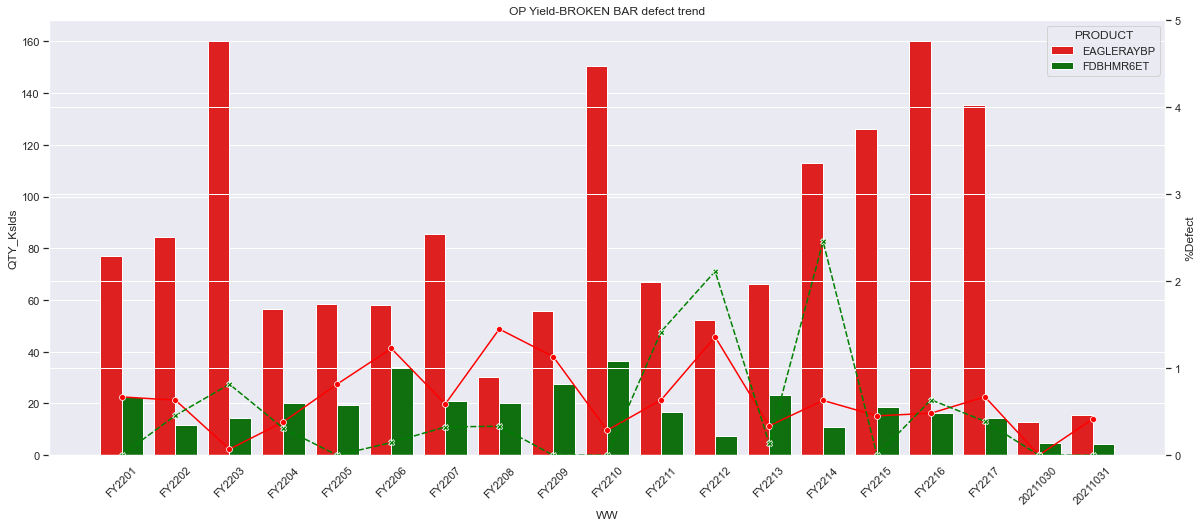

In [76]:
fig1, ax3 = plt.subplots(figsize=(20,8))
ax4=ax3.twinx()
palette = ("red","green")

sns.barplot(x='WW', y='TOTAL', data=PP, hue='PRODUCT',palette=(palette),ax=ax3)
sns.set(style="darkgrid", color_codes=True)
ax3.set_xticklabels(ax3.get_xticks(), rotation=45)
ax3.set_ylabel("QTY_Kslds")
ax3.set(title='OP Yield-BROKEN BAR defect trend')

ax4.set_ylim(0,5)
sns.lineplot(x='WW',y='%DEFECT_BRK', data=PP, hue='PRODUCT', style="PRODUCT", markers=True,palette=(palette), ax=ax4, legend = None)
ax4.set_ylabel("%Defect")

#style.use('seaborn-pastel')

In [77]:
#last_date = EF_Defect.loc[EF_Defect.Time_Date == date2,'TotalScrapQty'].values[0]
last_date = EF_Defect.iloc[-1].Time_Date
#last_date = EF_Defect.iloc[-1:]
#last_date
Drill = all.loc[all.Time_Date == last_date]
Drill = Drill.iloc[:,[1,8,9,10,12,16]]
Drill["STEP_REASON"] = Drill["STEPNAME"]+"_"+Drill["REASONCODE"]
Drill.dropna(subset = ["DEF_CODE"], inplace=True)
#Drill["REASONQTY_STR"] = Drill['REASONQTY'].astype('string')
ER_PI = Drill.loc[Drill.PRODUCT == "EAGLERAYBP"]
FD_PI = Drill.loc[Drill.PRODUCT == "FDBHMR6ET"]
#FD_PI
Drill

,Time_Date,DEF_CODE,STEPNAME,REASONCODE,REASONQTY,PRODUCT,STEP_REASON
324,20211031,110.0,100X_,178-TaperBL,12.0,EAGLERAYBP,100X__178-TaperBL
325,20211031,130.0,ComposeLot_,139-BrkBarM,65.0,EAGLERAYBP,ComposeLot__139-BrkBarM


Text(0.5, 1.0, 'EAGLERAYBP-BRK_BAR-20211031\n')

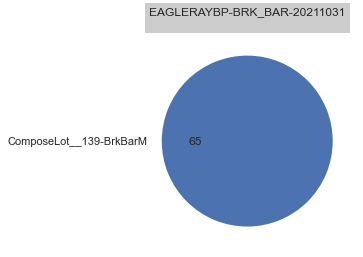

In [78]:

#Drill.plot.pie(autopct="%.1f%%");
#plot = Drill.plot.pie(y='REASONQTY', labels=STEP_REASON, figsize=(5, 5))
EBP_PI = ER_PI.loc[ER_PI.DEF_CODE == 130]
plt.pie(EBP_PI.REASONQTY, labels=EBP_PI.STEP_REASON, autopct = autopct_format(EBP_PI.REASONQTY), labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });

plt.title("EAGLERAYBP-BRK_BAR-20211031\n", bbox={'facecolor':'0.8', 'pad':5})

<ipython-input-79-46ca23693006>:1: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(FD_PI.REASONQTY, labels=FD_PI.STEP_REASON, autopct = autopct_format(FD_PI.REASONQTY), labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });


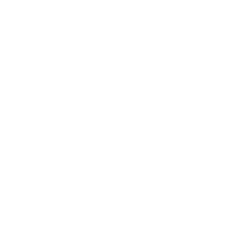

In [79]:
plt.pie(FD_PI.REASONQTY, labels=FD_PI.STEP_REASON, autopct = autopct_format(FD_PI.REASONQTY), labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });